In [66]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [67]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

In [68]:
# load files
train_X = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/train_X.npz')
train_y = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/train_y.npz')
test_X = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/test_X.npz')
test_y = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/test_y.npz')

In [69]:
# define constants
batch_size = 128
epochs = 100
num_classes = 9

In [70]:
len(train_X['X']), len(train_y['y']), len(test_X['X']), len(test_y['y'])

(648, 648, 153, 153)

In [71]:
# define the model architecture with CNN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(13,2300)),
                          # hidden layers
                          keras.layers.Reshape(target_shape=(13,2300,1)),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.25), # Abandon some of them, to speed up execution and increase reliability
                          keras.layers.Flatten(input_shape=(13,2300)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
# save the best model as digits_model.h5
filepath = '/model/best_model.h5'
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

In [73]:
# define a callback to monitor val_loss
monitor_earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [74]:
history = model.fit(train_X['X'], train_y['y'],
                    validation_data=(test_X['X'], test_y['y']),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[model_checkpoint, monitor_earlystop])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


6/6 [==============================] - 2s 231ms/step - loss: 2.1198 - accuracy: 0.1682 - val_loss: 1.7596 - val_accuracy: 0.3268
Epoch 2/100
6/6 [==============================] - 1s 208ms/step - loss: 1.8243 - accuracy: 0.2593 - val_loss: 1.6551 - val_accuracy: 0.3072
Epoch 3/100
6/6 [==============================] - 1s 207ms/step - loss: 1.7302 - accuracy: 0.3148 - val_loss: 1.6446 - val_accuracy: 0.3922
Epoch 4/100
6/6 [==============================] - 1s 206ms/step - loss: 1.6486 - accuracy: 0.3457 - val_loss: 1.4704 - val_accuracy: 0.3595
Epoch 5/100
6/6 [==============================] - 1s 208ms/step - loss: 1.5322 - accuracy: 0.3719 - val_loss: 1.4503 - val_accuracy: 0.3464
Epoch 6/100
6/6 [==============================] - 1s 206ms/step - loss: 1.4930 - accuracy: 0.3796 - val_loss: 1.4575 - val_accuracy: 0.4118
Epoch 7/100
6/6 [==============================] - 1s 207ms/step - loss: 1.3835 - accuracy: 0.4537 - val_loss: 1.4093 - val_accuracy: 0.4052
Epoch 8/100
6/6 [========

In [75]:
# download the best model
from google.colab import files
files.download(filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
# save model
best_model = 'best_model.h5'
model.save(best_model)

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 29900)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 13, 2300, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 2298, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 2296, 64)       18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 2294, 32)       18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 1147, 32)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 1147, 32)      

In [78]:
# evaluate the model using test dataset
test_loss, test_acc = model.evaluate(test_X['X'], test_y['y'])
print("Test Accuracy: ", test_acc)

5/5 [==============================] - 0s 29ms/step - loss: 0.1354 - accuracy: 0.9608
Test Accuracy:  0.9607843160629272


In [56]:
# # load model
# load_model = keras.models.load_model(best_model)
# load_model.summary()
# # evaluate the load model using test dataset
# test_loss, test_acc = model.evaluate(test_X['X'], test_y['y'])
# print("Load Test Accuracy: ", test_acc)

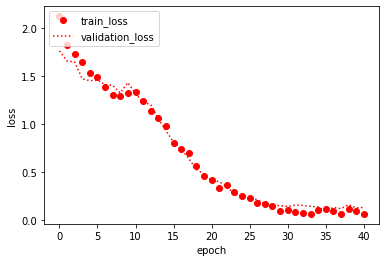

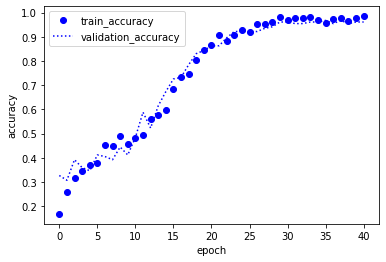

In [79]:
# evaluate the model using test dataset - show performance
fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label="train_loss")
loss_ax.plot(history.history['val_loss'], 'r:', label="validation_loss")
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label="train_accuracy")
acc_ax.plot(history.history['val_accuracy'], 'b:', label="validation_accuracy")
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()